In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
import datetime as dt


In [3]:
df= pd.read_csv('company_data.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,CustomerID,FirstName,LastName,City,Country,Phone,OrderID,OrderDate,OrderNumber,TotalAmount,...,UnitPrice,Package,IsDiscontinued,SupplierID,CompanyName,ContactName,City.1,Country.1,Phone.1,Fax
0,85.0,Paul,Henriot,Reims,France,26.47.15.10,1.0,7/4/2012 0:00,542378.0,440.0,...,21.00,1 kg pkg.,False,5.0,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Oviedo,Spain,(98) 598 76 54,NaN
1,85.0,Paul,Henriot,Reims,France,26.47.15.10,1.0,7/4/2012 0:00,542378.0,440.0,...,14.00,32 - 1 kg pkgs.,True,20.0,Leka Trading,Chandra Leka,Singapore,Singapore,555-8787,NaN
2,85.0,Paul,Henriot,Reims,France,26.47.15.10,1.0,7/4/2012 0:00,542378.0,440.0,...,34.80,24 - 200 g pkgs.,False,14.0,Formaggi Fortini s.r.l.,Elio Rossi,Ravenna,Italy,(0544) 60323,(0544) 60603
3,79.0,Karin,Josephs,Münster,Germany,0251-031259,2.0,7/5/2012 0:00,542379.0,1863.4,...,23.25,40 - 100 g pkgs.,False,6.0,Mayumi's,Mayumi Ohno,Osaka,Japan,(06) 431-7877,NaN
4,79.0,Karin,Josephs,Münster,Germany,0251-031259,2.0,7/5/2012 0:00,542379.0,1863.4,...,53.00,50 - 300 g pkgs.,False,24.0,"G'day, Mate",Wendy Mackenzie,Sydney,Australia,(02) 555-5914,(02) 555-4873


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      2158 non-null   float64
 1   FirstName       2158 non-null   object 
 2   LastName        2158 non-null   object 
 3   City            2158 non-null   object 
 4   Country         2158 non-null   object 
 5   Phone           2158 non-null   object 
 6   OrderID         2155 non-null   float64
 7   OrderDate       2155 non-null   object 
 8   OrderNumber     2155 non-null   float64
 9   TotalAmount     2155 non-null   float64
 10  ProductID       2157 non-null   float64
 11  ProductName     2157 non-null   object 
 12  UnitPrice       2157 non-null   float64
 13  Package         2157 non-null   object 
 14  IsDiscontinued  2157 non-null   object 
 15  SupplierID      2157 non-null   float64
 16  CompanyName     2157 non-null   object 
 17  ContactName     2157 non-null   o

Data Cleaning & Preprocessing


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['Fax'], inplace=True)

In [ ]:
df.dropna(subset=['OrderID'], inplace=True)

In [ ]:
df['OrderDate'] = pd.to_datetime(df['OrderDate']) 

In [ ]:
for col in df.columns:
    if 'ID' in col or 'Number' in col:
        df[col] = df[col].astype(int)

In [ ]:
df.rename(columns={'City.1':'SuppCity','Country.1':'SuppCountry','Phone.1':'SuppPhone'},inplace=True)

In [ ]:
df['FullName']=df['FirstName']+ ' '+df['LastName']

In [ ]:
df[df.duplicated(subset='OrderID')]
df[['OrderID', 'OrderDate', 'OrderNumber', 'TotalAmount', 'ProductID','ProductName', 'UnitPrice']]

,OrderID,OrderDate,OrderNumber,TotalAmount,ProductID,ProductName,UnitPrice
0,1,2012-07-04,542378,440.0,11,Queso Cabrales,21.00
1,1,2012-07-04,542378,440.0,42,Singaporean Hokkien Fried Mee,14.00
2,1,2012-07-04,542378,440.0,72,Mozzarella di Giovanni,34.80
3,2,2012-07-05,542379,1863.4,14,Tofu,23.25
4,2,2012-07-05,542379,1863.4,51,Manjimup Dried Apples,53.00
...,...,...,...,...,...,...,...
2150,830,2014-05-06,543207,1374.6,2,Chang,19.00
2151,830,2014-05-06,543207,1374.6,3,Aniseed Syrup,10.00
2152,830,2014-05-06,543207,1374.6,4,Chef Anton's Cajun Seasoning,22.00
2153,830,2014-05-06,543207,1374.6,6,Grandma's Boysenberry Spread,25.00


In [ ]:
df.columns

Index(['CustomerID', 'FirstName', 'LastName', 'City', 'Country', 'Phone',
       'OrderID', 'OrderDate', 'OrderNumber', 'TotalAmount', 'ProductID',
       'ProductName', 'UnitPrice', 'Package', 'IsDiscontinued', 'SupplierID',
       'CompanyName', 'ContactName', 'SuppCity', 'SuppCountry', 'SuppPhone',
       'FullName'],
      dtype='object')

In [ ]:
Sales_Data = df[['CustomerID','FullName', 'City', 'Country','OrderID', 'OrderDate', 'OrderNumber', 'TotalAmount']] 

In [ ]:
Sales_Data.duplicated().sum()

np.int64(1325)

In [ ]:
Sales_Data.drop_duplicates(inplace=True)

C:\Users\start\AppData\Local\Temp\ipykernel_23968\662543425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_Data.drop_duplicates(inplace=True)


Univariate Analysis

In [ ]:
Sales_Data['TotalAmount'].describe().round()

count      830.0
mean      1632.0
std       1991.0
min         12.0
25%        480.0
50%       1016.0
75%       2029.0
max      17250.0
Name: TotalAmount, dtype: float64

Shape Of Data Using Histogram

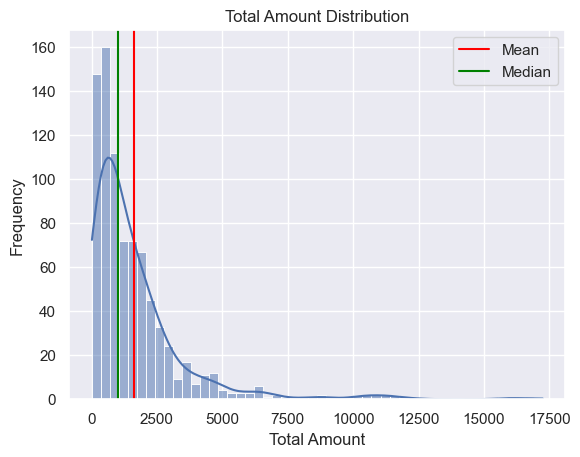

In [ ]:
sns.histplot(data=Sales_Data,x='TotalAmount',bins=50,kde=True)
plt.title('Total Amount Distribution')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.axvline(x=Sales_Data['TotalAmount'].mean(),color='red',label='Mean')
plt.axvline(x=Sales_Data['TotalAmount'].median(),color='green',label='Median')
plt.legend()
plt.show()

Insight

The histogram of TotalAmount is right-skewed meaning most orders have low amounts ,The mean is higher than the median and there are a few with very high values pulling the mean up.


 Five Number Summary Using Boxplot

In [ ]:
px.box(data_frame=Sales_Data,x='TotalAmount')

The boxplot shows the general distribution min, Q1, median, Q3, and max.  
The lower boundary was (12.5), and the upper boundary was (4337), Any values outside this range are outliers.


Order Count by Country


In [ ]:
CountryDist=Sales_Data['Country'].value_counts()

In [ ]:
px.bar(data_frame=CountryDist,title='Country Distribution',color=CountryDist.index)


In [ ]:
px.pie(data_frame=Sales_Data,title='Frequency of Countries Sales',names='Country') 

Order Count by City

In [ ]:
Sales_Data['City'].value_counts()

City
London            46
Rio de Janeiro    34
Sao Paulo         31
Boise             31
Graz              30
                  ..
Kirkland           3
Butte              3
Vancouver          3
Caracas            2
Walla Walla        2
Name: count, Length: 69, dtype: int64

In [ ]:
px.bar(data_frame=Sales_Data['City'].value_counts(),title='City Distribution')

The countries with the most orders was Germany & USA with 122 orders and 14.7% of total orders, The country with the fewest orders in Norway with only 6 orders and 0.72% of total orders.
The city with the most orders is London with 46 orders. Here a problem appears because all the orders from the UK are 56 orders, 46 of which are from London 82% of the total orders in UK, This indicates there is an issue with the other cities. 


Bivariate Analysis

In [ ]:
CountrySales=Sales_Data.groupby('Country',as_index=False)['TotalAmount'].sum().sort_values('TotalAmount',ascending=False)

In [ ]:
px.bar(data_frame=CountrySales,x='Country',y='TotalAmount',title='Total Amount by Country',color='Country')

When comparing Brazil and Austria in terms of the number of orders and total amount, we find that Brazil is significantly ahead in order volume with 83 orders compared to 40 for Austria, However after summing the orders and calculating total amount, Austria leads with total sales of 139.4k, compared to 114.9k for Brazil.


In [ ]:
px.pie(data_frame=CountrySales,title='Total Amount by Country',names='Country',values='TotalAmount')

In [ ]:
Top_20_City_Sales=Sales_Data.groupby('City',as_index=False)['TotalAmount'].sum().sort_values('TotalAmount',ascending=False).head(20)

In [ ]:
px.bar(data_frame=Top_20_City_Sales,x='City',y='TotalAmount',title='Total Amount by City (Top 20)',color='City')

When calculating the number of orders by city, London ranked first with 46 orders However after calculating the total amount it dropped to fifth place. This means that although the number of orders from London is high, their value is relatively low


In [ ]:
Sales_Data.columns

Index(['CustomerID', 'FullName', 'City', 'Country', 'OrderID', 'OrderDate',
       'OrderNumber', 'TotalAmount'],
      dtype='object')

In [ ]:
Top_10_Customers_By_Sales =df.groupby('FullName',as_index=False)['TotalAmount'].sum().sort_values('TotalAmount',ascending=False).head(10)


In [ ]:
px.bar(data_frame=Top_10_Customers_By_Sales,x='FullName',y='TotalAmount',title='Top 10 Customers by Sales',color='FullName')

In [ ]:
Top_10_Customers_By_Orders=Sales_Data.groupby('FullName',as_index=False)['OrderID'].count().sort_values('OrderID',ascending=False).head(10)

In [ ]:
px.bar(data_frame=Top_10_Customers_By_Orders,x='FullName',y='OrderID',title='Top 10 Customers by Orders',color='FullName')

In [ ]:
monthly_sales=Sales_Data[['OrderDate','TotalAmount']]
monthly_sales=monthly_sales.set_index('OrderDate')
monthly_sales=monthly_sales.resample('M')['TotalAmount'].sum()
monthly_sales.head(10)



C:\Users\start\AppData\Local\Temp\ipykernel_23968\2975102174.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



OrderDate
2012-07-31    30192.10
2012-08-31    26609.40
2012-09-30    27636.00
2012-10-31    41203.60
2012-11-30    49704.00
2012-12-31    50953.40
2013-01-31    66692.80
2013-02-28    41207.20
2013-03-31    39979.90
2013-04-30    55699.39
Freq: ME, Name: TotalAmount, dtype: float64

In [ ]:
px.line(data_frame=monthly_sales,title='Monthly Sales',y='TotalAmount',markers=True)

From the line chart that shows sales over the months, it's clear that April 2014 had the highest sales, The following month May had the lowest sales, and that’s mainly because the dataset only includes the first 6 days of May not the full month.



In [ ]:
Sales_Data.tail(10)

,CustomerID,FullName,City,Country,OrderID,OrderDate,OrderNumber,TotalAmount
2107,62,L?cia Carvalho,Sao Paulo,Brazil,821,2014-05-04,543198,2384.8
2110,80,Miguel Angel Paolino,México D.F.,Mexico,822,2014-05-04,543199,360.0
2111,44,Renate Messner,Frankfurt a.M.,Germany,823,2014-05-05,543200,1873.5
2115,46,Carlos Gonz?lez,Barquisimeto,Venezuela,824,2014-05-05,543201,510.0
2117,20,Roland Mendel,Graz,Austria,825,2014-05-05,543202,5218.0
2121,58,Guillermo Fern?ndez,México D.F.,Mexico,826,2014-05-05,543203,300.0
2123,73,Jytte Petersen,Kobenhavn,Denmark,827,2014-05-06,543204,244.3
2124,68,Michael Holz,Genève,Switzerland,828,2014-05-06,543205,586.0
2127,9,Laurence Lebihan,Marseille,France,829,2014-05-06,543206,1057.0
2130,65,Paula Wilson,Albuquerque,USA,830,2014-05-06,543207,1374.6


In [ ]:
monthly_orders=Sales_Data[['OrderDate','OrderID']]
monthly_orders=monthly_orders.set_index('OrderDate')
monthly_orders=monthly_orders.resample('M')['OrderID'].count()
monthly_orders.head(10)



C:\Users\start\AppData\Local\Temp\ipykernel_23968\407230166.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



OrderDate
2012-07-31    22
2012-08-31    25
2012-09-30    23
2012-10-31    26
2012-11-30    25
2012-12-31    31
2013-01-31    33
2013-02-28    29
2013-03-31    30
2013-04-30    31
Freq: ME, Name: OrderID, dtype: int64

In [ ]:
px.line(data_frame=monthly_orders,title='Monthly Orders',y='OrderID',labels={'OrderID':'Total Orders'},markers=True)

In [ ]:
monthly_sales_vs_orders=pd.merge(monthly_orders, monthly_sales, on='OrderDate').rename(columns={'OrderID':'Total Orders'}).sort_values(by='TotalAmount',ascending=False)
monthly_sales_vs_orders

,Total Orders,TotalAmount
OrderDate,,
2014-04-30,74,134630.56
2014-03-31,73,109825.45
2014-02-28,54,104561.95
2014-01-31,55,100854.72
2013-12-31,48,77476.26
2013-10-31,38,70328.50
2013-01-31,33,66692.80
2013-09-30,37,59733.02
2013-05-31,32,56823.70


After merging the datasets for the number of orders and total amount into one table, it's clear to see how each month performed in terms of both order volume and total amount In general months with more orders tend to have higher total amount, but there are some months with fewer orders that still generate higher total amount such as November 2012,  This merge helped provide a clearer picture of each month's performance.



Multivariate Analysis

In [ ]:
Multivariate_Columns=Sales_Data[['OrderDate','Country','TotalAmount']]
Multivariate_Columns['YearMonth']=Multivariate_Columns['OrderDate'].dt.to_period('M').astype(str)
country_monthly_sales=Multivariate_Columns.groupby(['YearMonth','Country'])['TotalAmount'].sum().reset_index()
country_monthly_sales.head(10)


C:\Users\start\AppData\Local\Temp\ipykernel_23968\2334089616.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YearMonth,Country,TotalAmount
0,2012-07,Austria,4483.4
1,2012-07,Belgium,3730.0
2,2012-07,Brazil,4223.6
3,2012-07,Finland,364.8
4,2012-07,France,2286.8
5,2012-07,Germany,7640.6
6,2012-07,Mexico,100.8
7,2012-07,Sweden,724.5
8,2012-07,Switzerland,3115.7
9,2012-07,USA,1300.8


In [ ]:
px.bar(country_monthly_sales,x='YearMonth',y='TotalAmount',color='Country',title='Monthly Sales by Country (Stacked Bar)')  

In [ ]:
px.scatter(data_frame=country_monthly_sales,x='YearMonth',y='TotalAmount',color='Country',size='TotalAmount',title='Monthly Sales by Country' )

From the scatter plot showing the multivariate analysis between months and countries' sales, it's clear that the USA consistently achieves the highest sales across most months followed by Germany, These two countries lead in overall sales, Austria which ranks third in total sales was the top performing country in only one month, while in the remaining months its sales were low, This drop might be because the number of orders went down or there were some market limits or maybe customer behavior changed.



In [ ]:
monthly_sales_and_country_count=Multivariate_Columns.groupby('YearMonth').agg({'Country':'nunique','TotalAmount':'sum'})
monthly_sales_and_country_count

,Country,TotalAmount
YearMonth,,
2012-07,11,30192.10
2012-08,11,26609.40
2012-09,11,27636.00
2012-10,13,41203.60
2012-11,11,49704.00
2012-12,15,50953.40
2013-01,15,66692.80
2013-02,14,41207.20
2013-03,12,39979.90


In [ ]:
px.bar(data_frame=monthly_sales_and_country_count,x=monthly_sales_and_country_count.index,y='TotalAmount',color='Country',title='Total Amount Of All Country Per Month')


In this analysis I focused on the number of unique countries that made purchases each month , This helps to understand how many different countries were active in each period, The idea is to see whether the same countries are buying from us regularly over time, or if some countries only appear in specific months. I noticed that April 2014 had the highest number of countries that bought from us, all countries made purchases that month, This probably explains why April 2014 was also the month with the highest sales.